# Titanic: Machine Learning from Disaster
- Predict survival on the Titanic
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

# Defining the problem statement
Complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.



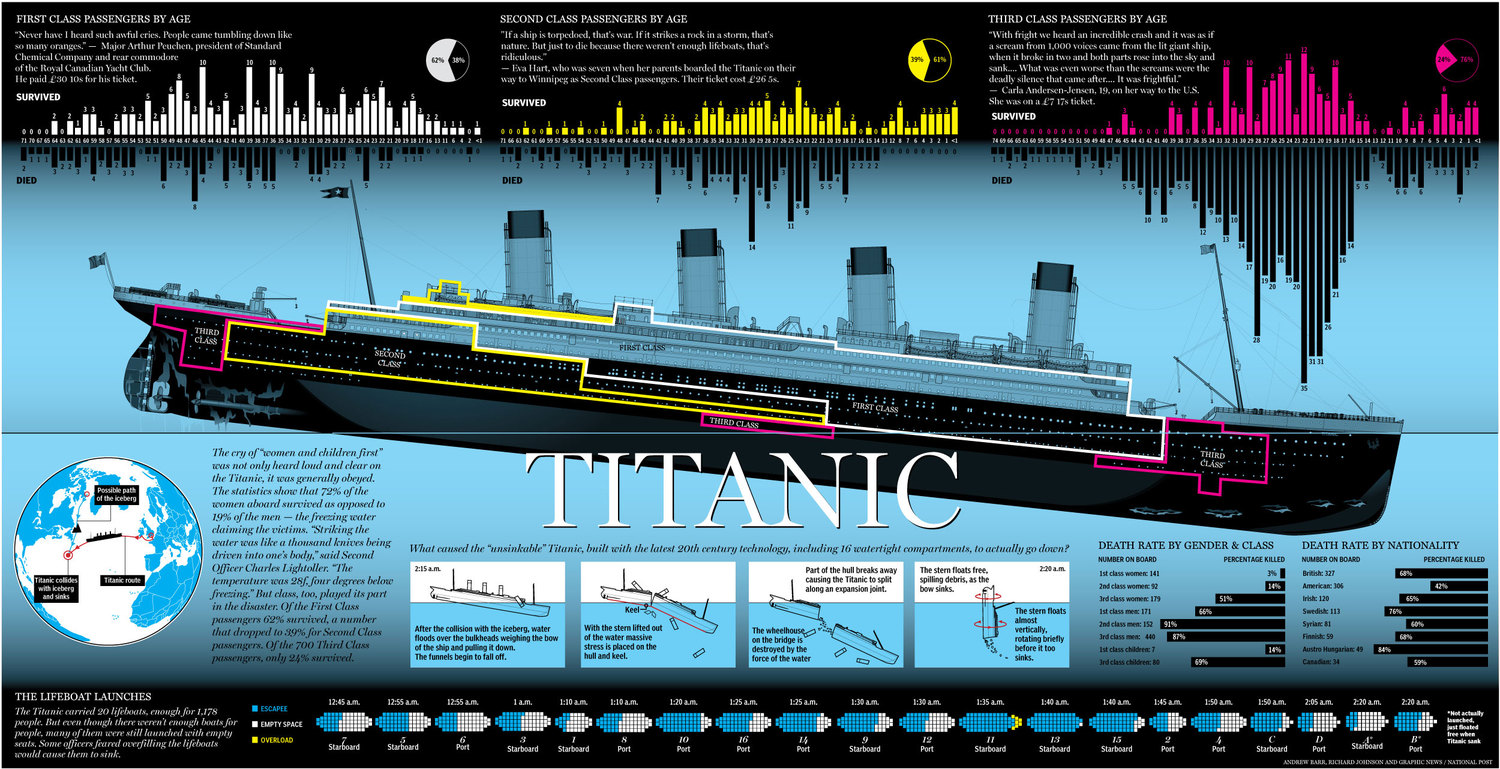

# Importing libraries that will be used in this Notebook


In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set() 
import matplotlib.pyplot as plt 
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier 
from xgboost import XGBClassifier


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score

import warnings
warnings.filterwarnings('ignore')

# Loading the data 


In [152]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#  Exploratory data analysis


In [153]:
train.head(10)
#train.head().style.background_gradient(cmap = 'Blues')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Dictionary
#From the Kaggle Data , here is the summary 

- Survived: (0 = No / 1 = Yes) 
- pclass: 	Ticket/ Passenger class	(1 = 1st / 2 = 2nd / 3 = 3rd) 
- name:     Name (can be of diffrent Rank Mr/Mrs/Miss/Sir...etc)
- sex :     Sex(male,female)
- age :     Age (number of months)

- sibsp:	Number of siblings / spouses aboard the Titanic  	
- parch:	Number of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number
- fare:     Passenger Fare (British pound)
- embarked:	Port of Embarkation(	C = Cherbourg / Q = Queenstown / S = Southampton) 


In [154]:
test.head(15)
#test.head().style.background_gradient(cmap = 'Blues')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [155]:
train.shape

(891, 12)

In [156]:
test.shape

(418, 11)

In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [158]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [159]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [160]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [161]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [162]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [163]:
#Another way to make sure there isn't inconssitant data 
#number of died > #Number of survived 
for col in train.columns:
    print(f'The column:{col}\nvalues_count:\n{train[col].value_counts()}\n\n')

The column:PassengerId
values_count:
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


The column:Survived
values_count:
Survived
0    549
1    342
Name: count, dtype: int64


The column:Pclass
values_count:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


The column:Name
values_count:
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


The column:Sex
values_count:
Sex
male      577

In [164]:
#Another way to make sure there isn't inconssitant data 
#number of died > #Number of survived 
for col in test.columns:
    print(f'The column:{col}\nvalues_count:\n{test[col].value_counts()}\n\n')

The column:PassengerId
values_count:
PassengerId
892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: count, Length: 418, dtype: int64


The column:Pclass
values_count:
Pclass
3    218
1    107
2     93
Name: count, dtype: int64


The column:Name
values_count:
Name
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: count, Length: 418, dtype: int64


The column:Sex
values_count:
Sex
male      266
female    152
Name: count, dtype: int64


The column:Age
values_count:
Age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79,

In [165]:
#Gradient background color for the numerical columns
#train.describe()
#train.describe().T
train.describe().style.background_gradient(cmap = 'Blues')

#NO incorrect data found for the numerical data...

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [166]:
test.describe().style.background_gradient(cmap = 'Blues')


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [167]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    
    df = pd.DataFrame([survived,dead])
    
    df.index = ['Survived','Dead']
    
    df.plot(kind='bar',stacked=True, figsize=(10,6))

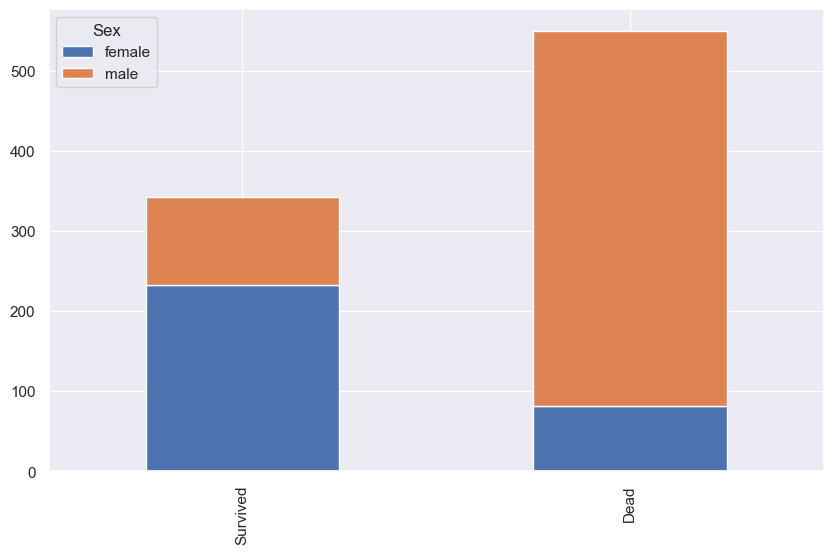

In [168]:
bar_chart('Sex')

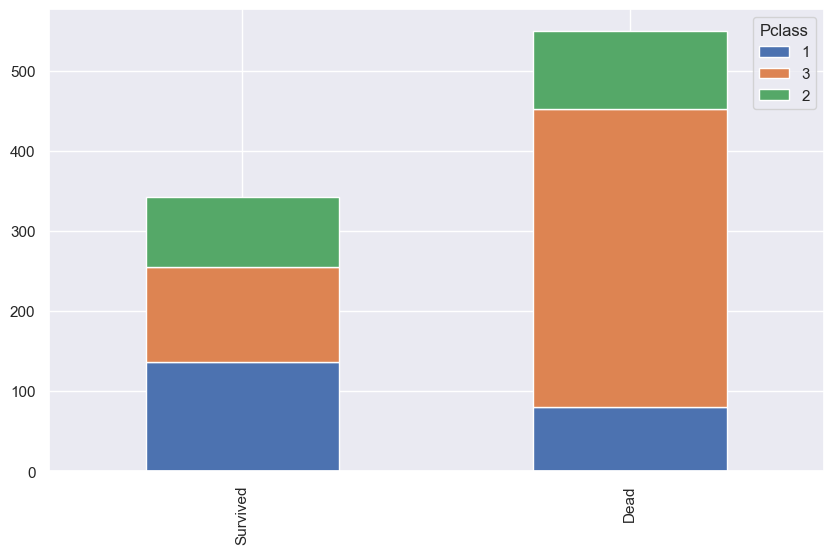

In [169]:
bar_chart('Pclass')

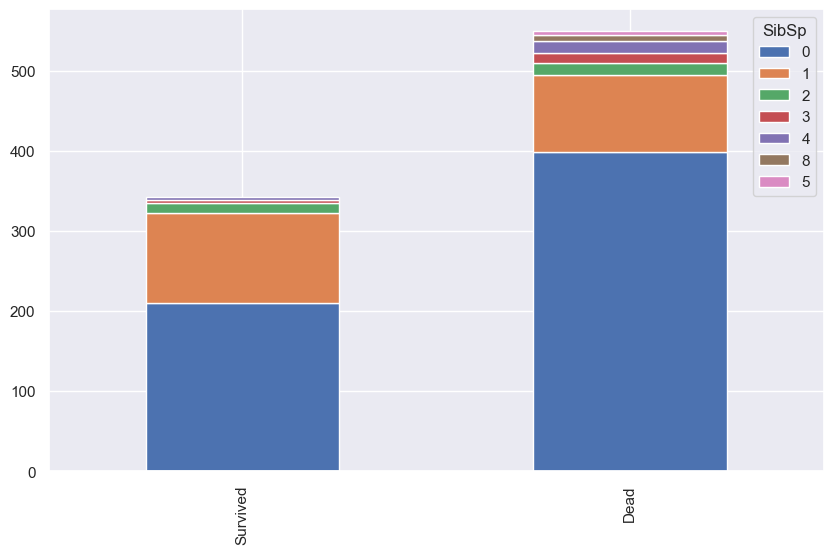

In [170]:
bar_chart('SibSp')

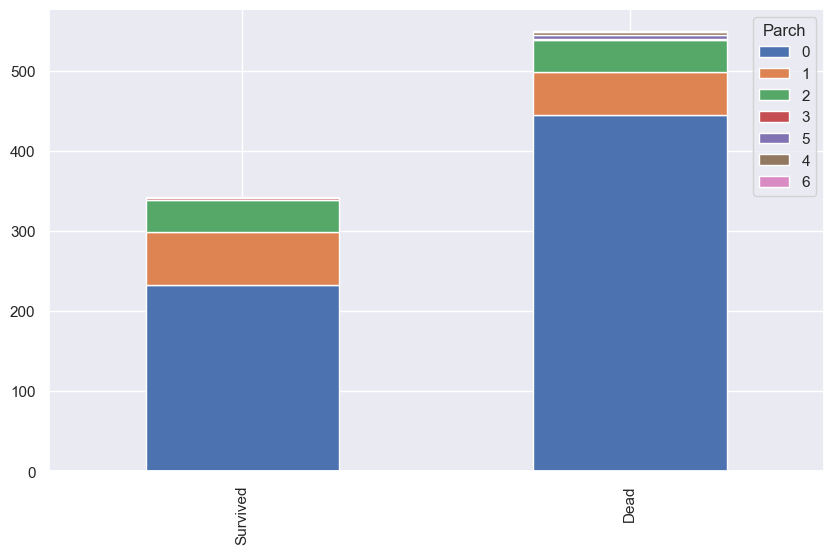

In [171]:
bar_chart('Parch')

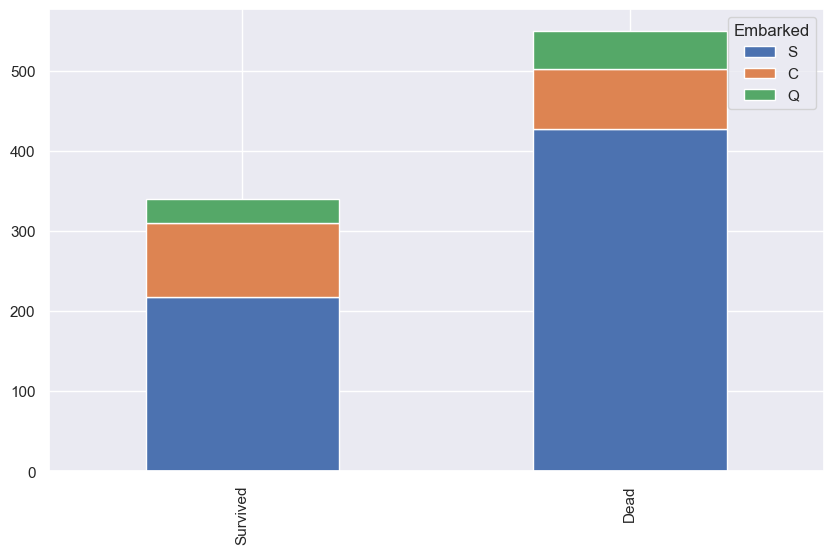

In [172]:
bar_chart('Embarked')

## 4. Feature engineering

Feature engineering is the process of using domain knowledge of the data  
to create features (**feature vectors**) that make machine learning algorithms work.  

feature vector is an n-dimensional vector of numerical features that represent some object.  
Many algorithms in machine learning require a numerical representation of objects,  
since such representations facilitate processing and statistical analysis.

In [173]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Name

In [174]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [175]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [176]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [177]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [178]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [179]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


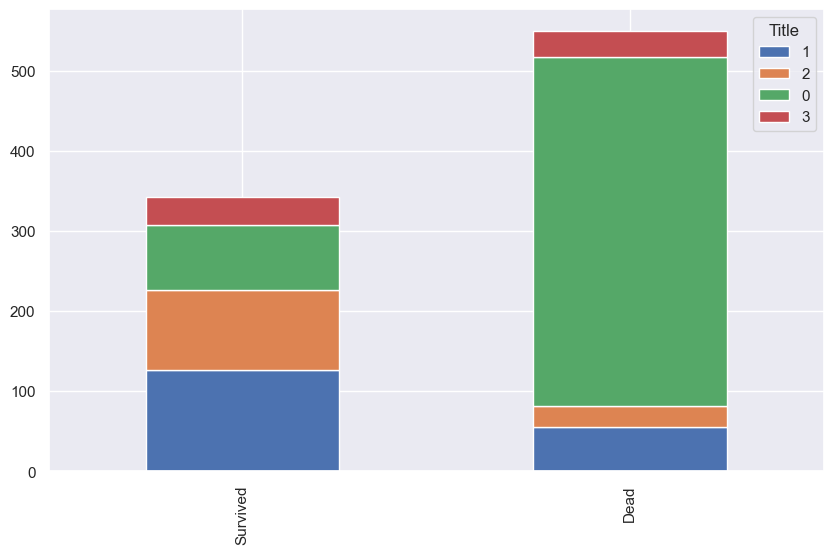

In [180]:
bar_chart('Title')

In [181]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [182]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [183]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


# Another way


In [184]:
#train['Name']

In [185]:
#test['Name']

In [186]:
#train_test_data = [train, test] # combining train and test dataset


In [187]:
'''
#some temproary feature engineering 
#replace Name by Rank & count them 
#all_data.drop('Name',axis=1,inplace=True)

def extract_title(name):
    title= name.split(',')[1].split('.')[0]
    
    if (title.strip() == "Mr") :
        return 0 
    
    
    if (title.strip() == "Mrs") : 
        return 1 
    
    if (title.strip() == "Miss") :
        return 2
    
    else :
        return 3 #none of the above  
 '''

'\n#some temproary feature engineering \n#replace Name by Rank & count them \n#all_data.drop(\'Name\',axis=1,inplace=True)\n\ndef extract_title(name):\n    title= name.split(\',\')[1].split(\'.\')[0]\n    \n    if (title.strip() == "Mr") :\n        return 0 \n    \n    \n    if (title.strip() == "Mrs") : \n        return 1 \n    \n    if (title.strip() == "Miss") :\n        return 2\n    \n    else :\n        return 3 #none of the above  \n '

In [188]:
#train['Rank'] = train['Name'].apply(extract_title)

In [189]:
#test['Rank'] = test['Name'].apply(extract_title)

In [190]:
#train['Rank'] = pd.to_numeric(train['Rank'])

In [191]:
#test

In [192]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


# Sex

### Sex

male: 0
female: 1

In [193]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

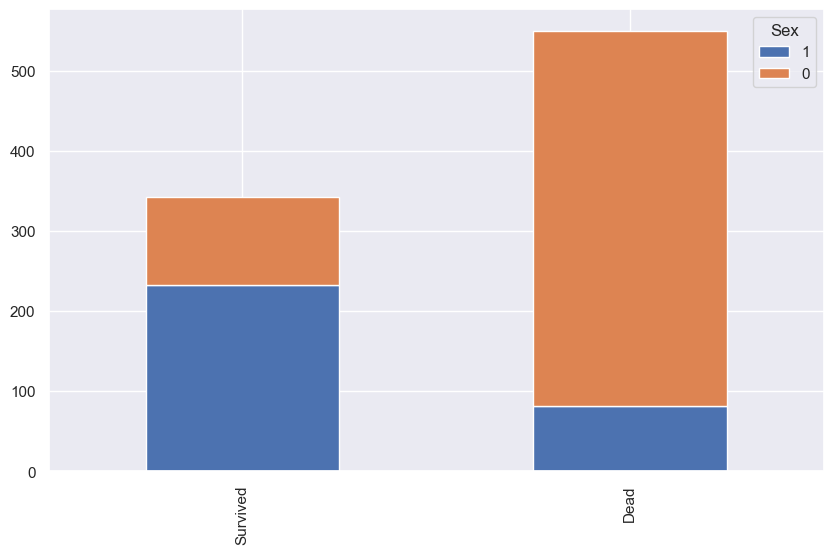

In [194]:
bar_chart('Sex')

In [195]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,0



# Another way


In [196]:
#Convert Sex into 0,1 
#train['Sex'] = train['Sex'].replace(['male','female'],[0,1])

In [197]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


### Age


In [198]:
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [199]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)

train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)


# Another way
'''
#fill missing data with median for age and mode for embraked 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') 
df_train['Age'] = imputer.fit_transform(df_train[['Age']])
'''

"\n#fill missing data with median for age and mode for embraked \nfrom sklearn.impute import SimpleImputer\n\nimputer = SimpleImputer(strategy='mean') \ndf_train['Age'] = imputer.fit_transform(df_train[['Age']])\n"

In [200]:
train.head(20)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

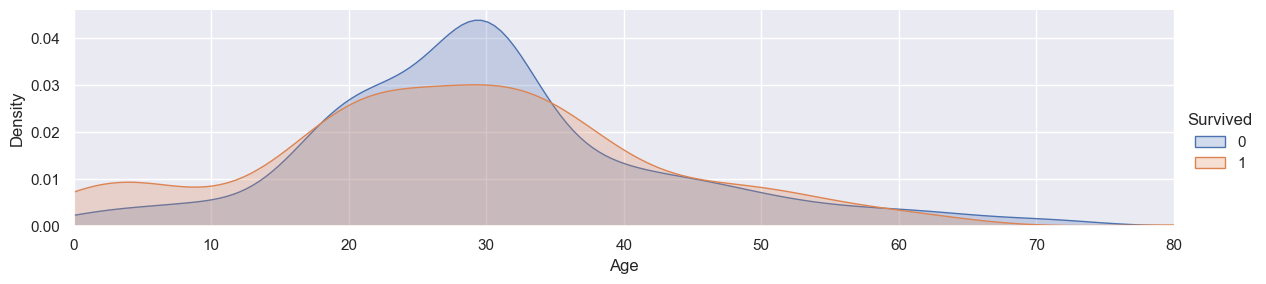

In [201]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)

facet.map(sns.kdeplot,'Age',shade= True)

facet.set(xlim=(0, train['Age'].max()))

facet.add_legend()
 
plt.show() 

(0.0, 20.0)

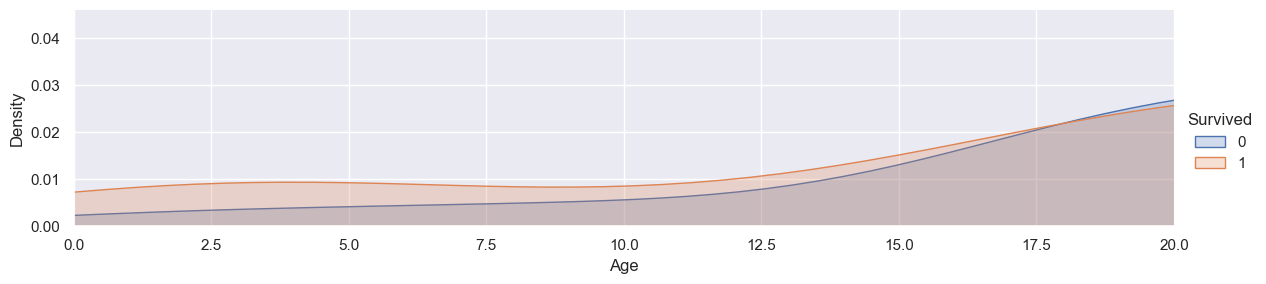

In [202]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

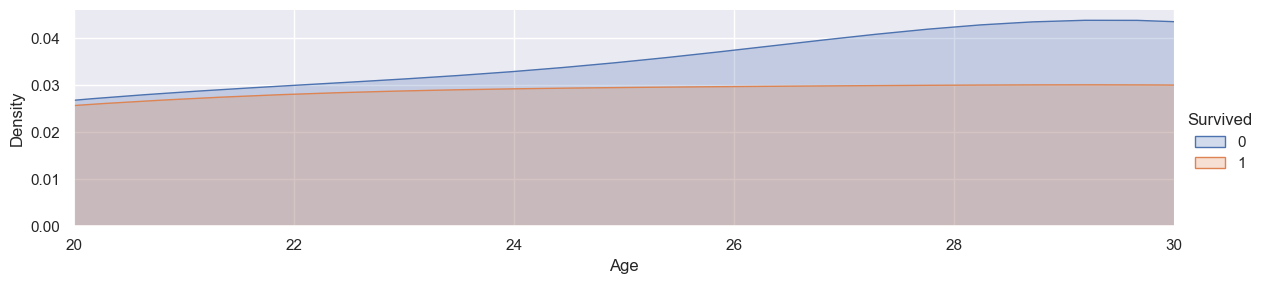

In [203]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

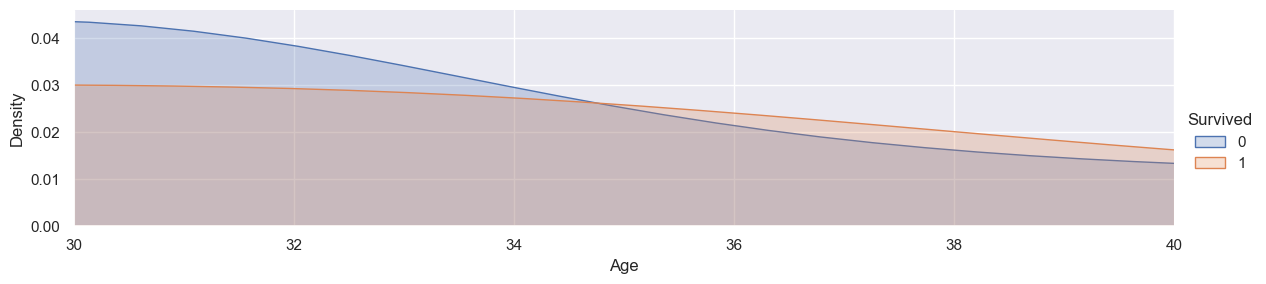

In [204]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

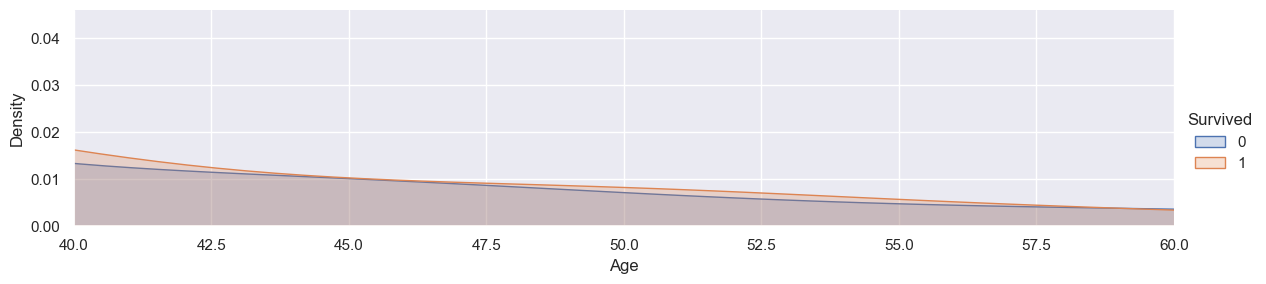

In [205]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60.0, 80.0)

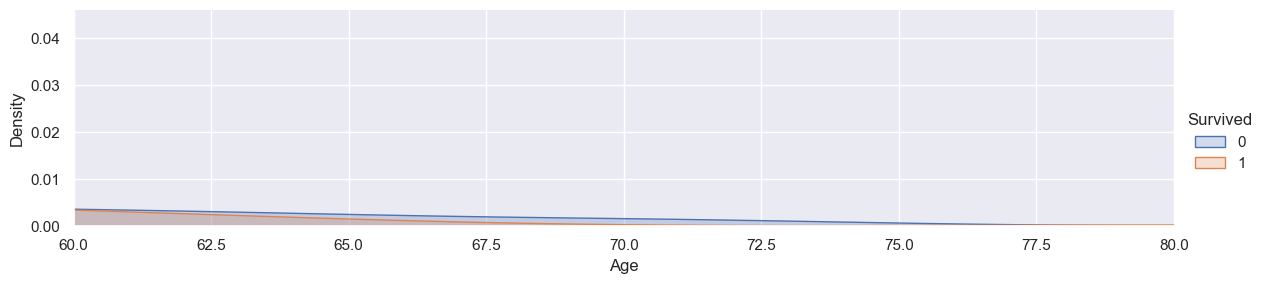

In [206]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [208]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.1+ KB


In [209]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [210]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,1.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,1.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,1.0,0,0,111369,30.0000,C148,C,0


In [211]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,1,3.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,0,2.0,0,0,359309,8.0500,NaN,S,0


# Embarked

<Axes: >

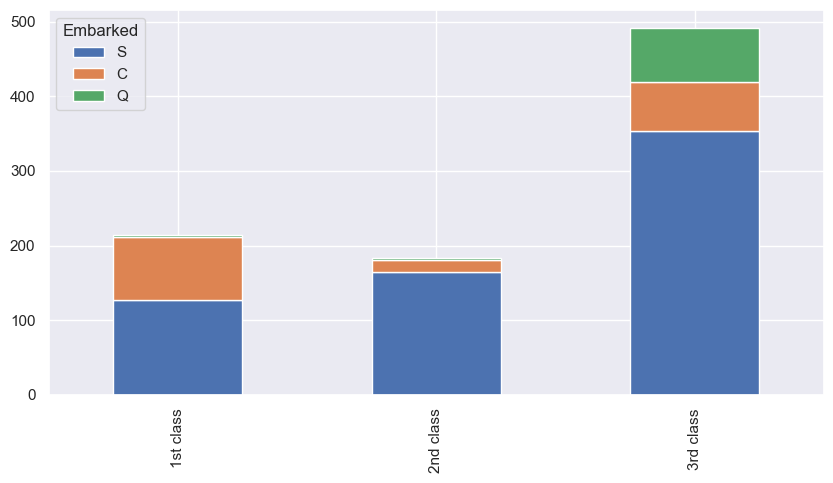

In [212]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark  
more than 50% of 2nd class are from S embark  
more than 50% of 3rd class are from S embark

**fill out missing embark with S embark**

In [213]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [214]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [215]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,13.0000,NaN,0,3
887,888,1,1,1,1.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,1,1.0,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,0,1.0,0,0,111369,30.0000,C148,1,0


# Fare

In [216]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


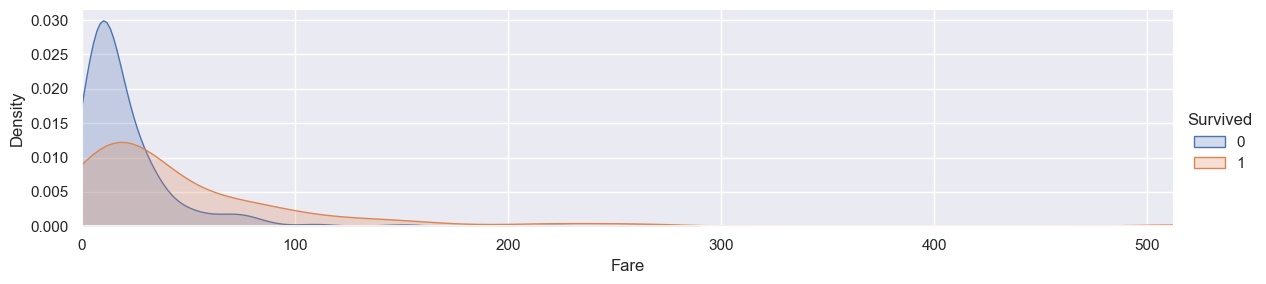

In [217]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show() 

(0.0, 20.0)

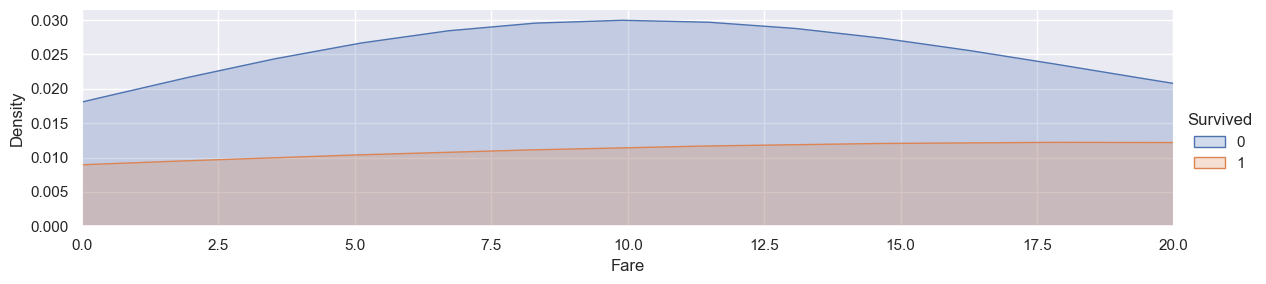

In [218]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0.0, 30.0)

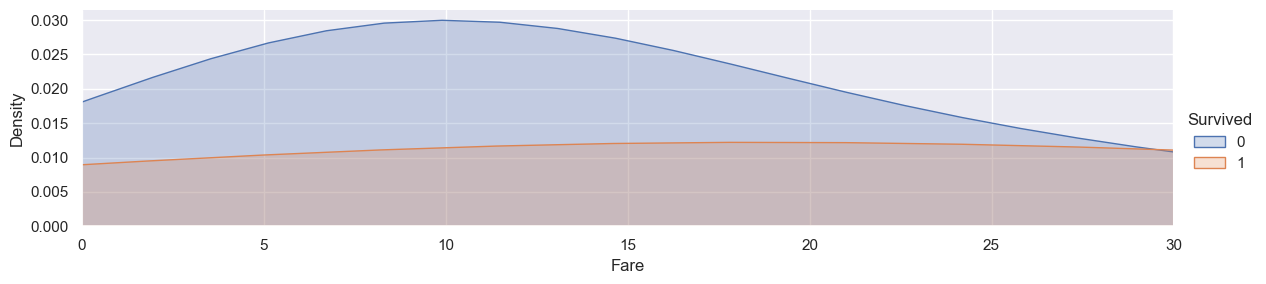

In [219]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)


(0.0, 512.3292)

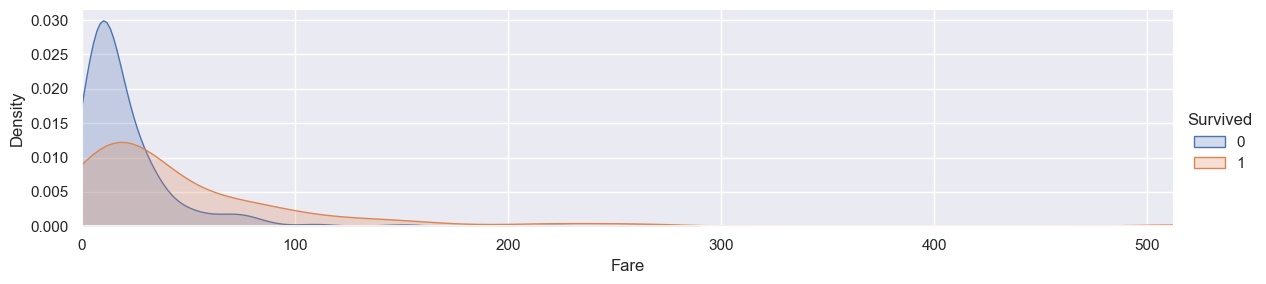

In [220]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [221]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [222]:
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,E46,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,NaN,1,2


In [223]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,0,3.0,0,0,240276,0.0,NaN,2,0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,0,2


# Cabin

In [224]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [225]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<Axes: >

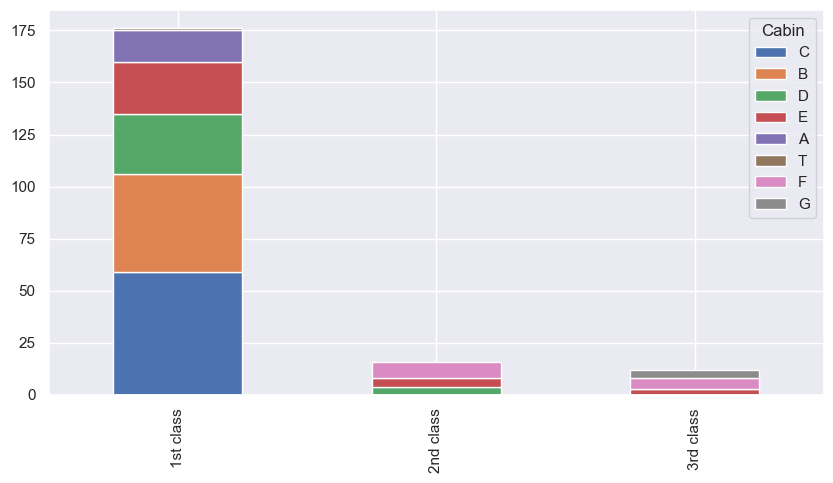

In [226]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [227]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [228]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

# FamilySize

In [229]:
train["FamilySize"] = train["SibSp"] + train["Parch"]+ 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

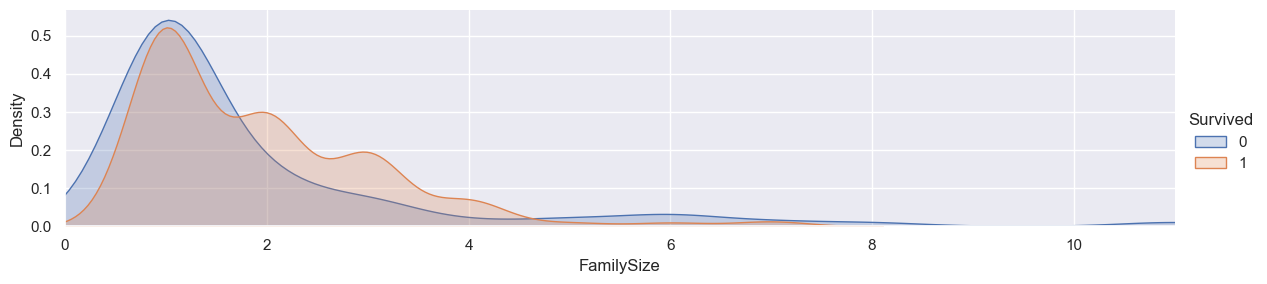

In [230]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [231]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [232]:
train.head(44)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0
5,6,0,3,0,2.0,0,0,330877,0.0,2.0,2,0,0.0
6,7,0,1,0,3.0,0,0,17463,2.0,1.6,0,0,0.0
7,8,0,3,0,0.0,3,1,349909,1.0,2.0,0,3,1.6
8,9,1,3,1,2.0,0,2,347742,0.0,2.0,0,2,0.8
9,10,1,2,1,0.0,1,0,237736,2.0,1.8,1,2,0.4


In [233]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [234]:
features_drop = ['Ticket', 'SibSp', 'Parch']

#features_drop = ['Ticket', 'SibSp', 'Parch' , 'Name']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

train = train.drop(['PassengerId'], axis=1)


# ML Model

In [235]:
train_data = train.drop('Survived', axis=1)

target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [236]:
train_data.head(5)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [237]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


# KFold 

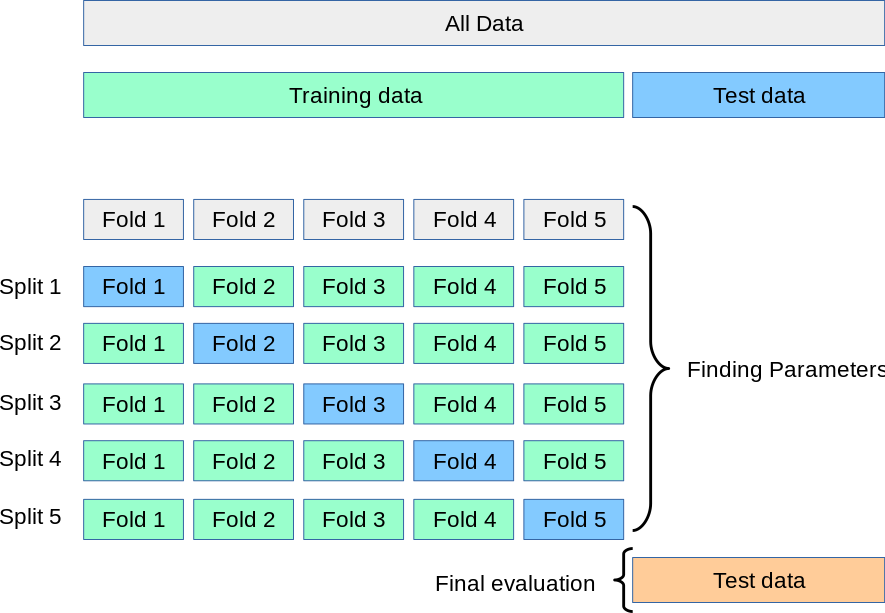

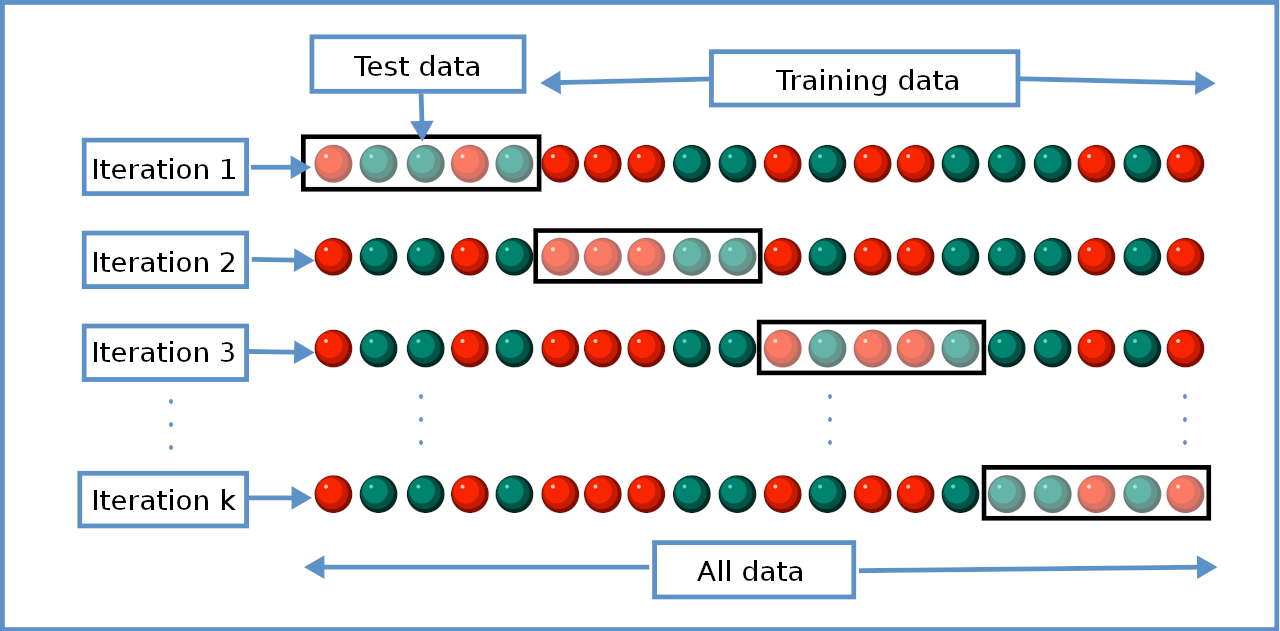

In [238]:
k_fold = KFold(n_splits= 5, shuffle=True, random_state=42)

# KNN

In [239]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

print(score)

[0.80446927 0.81460674 0.83146067 0.79213483 0.83707865]


In [240]:
# kNN Score
round(np.mean(score)*100, 2)

81.6

# Decision Tree

In [241]:
clf2 = DecisionTreeClassifier(criterion = "entropy" ,max_depth=4 ,random_state= 0)
scoring = 'accuracy'
score = cross_val_score(clf2, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81564246 0.8258427  0.87078652 0.80337079 0.84831461]


In [242]:
# decision tree Score
round(np.mean(score)*100, 2)

83.28

# Random Forest

In [243]:
clf3 = RandomForestClassifier(n_estimators=100 , criterion = "entropy" , max_depth= 4 ,random_state= 0)
scoring = 'accuracy'
score = cross_val_score(clf3, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82681564 0.8258427  0.85955056 0.79775281 0.84269663]


In [244]:
# Random Forest Score
round(np.mean(score)*100, 2)

83.05

# Naive Bayes

In [245]:
clf4 = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf4, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78212291 0.80337079 0.80337079 0.76966292 0.7752809 ]


In [246]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.68

# GradientBoostingClassifier

In [247]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=100, max_features=5)
scoring = 'accuracy'
score = cross_val_score(gbc, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.83240223 0.81460674 0.86516854 0.79775281 0.83146067]


In [248]:
round(np.mean(score)*100,2)

82.83

# SVM

In [249]:
clf5 = SVC( kernel='rbf', random_state= 0 )
scoring = 'accuracy'
score = cross_val_score(clf5, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82681564 0.83707865 0.86516854 0.80898876 0.83707865]


In [250]:
round(np.mean(score)*100,2)

83.5

# AdaBoostClassifier

In [251]:
clf6 = AdaBoostClassifier(n_estimators=50, learning_rate=0.2)
scoring = 'accuracy'
score = cross_val_score(clf6, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score)

[0.80446927 0.81460674 0.85955056 0.7752809  0.83707865]


In [252]:
round(np.mean(score)*100,2)

81.82

# XGBClassifier

In [253]:
clf8 = XGBClassifier(max_depth = 4 , learning_rate = 0.3 ,n_estimators= 50, random_state=42 , max_features= 6 )

In [254]:
scoring = 'accuracy'
score = cross_val_score(clf8, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8547486  0.81460674 0.83707865 0.78089888 0.85393258]


In [255]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

82.83

In [256]:
#Voting

In [257]:
clf11 = LogisticRegression(random_state=42)
clf21 = KNeighborsClassifier(n_neighbors=5 )
clf32 = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , n_estimators= 5, random_state=42)
clf44 = RandomForestClassifier(n_estimators=50 ,criterion = 'entropy', max_depth=4, max_features=6 ,random_state=42)

In [258]:
v_clf55 = VotingClassifier(estimators=[("LogisticRegression" , clf11) , ('KNeighborsClassifier' , clf21) ,
                                     ("XGBClassifier" , clf32) ,("RandomForestClassifier" , clf44)] , voting = "hard")

In [259]:
scoring = 'accuracy'
score = cross_val_score(v_clf55, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82681564 0.83146067 0.86516854 0.7752809  0.83146067]


In [260]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

82.6

# Train_Test_Split

In [261]:
X = train.drop('Survived',axis=1) #get all features expect IFT
y = train['Survived']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42) #splitting data into 80/20

# LogisticRegression

In [262]:
LogR = LogisticRegression(random_state = 42)

In [263]:
LogR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [264]:
y_pred = LogR.predict(X_test)

In [265]:
#from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[326  54]
 [ 65 179]]
80.92948717948718


In [266]:
print(LogR.score(X_test , y_test)*100)

80.92948717948718


# For Classification

$$Precision = \dfrac{TP}{TP + FP}$$

$$Recall = \dfrac{TP}{TP + FN}$$

$$F1 = 2 \cdot \dfrac{Precision \cdot Recall}{Precision + Recall}$$

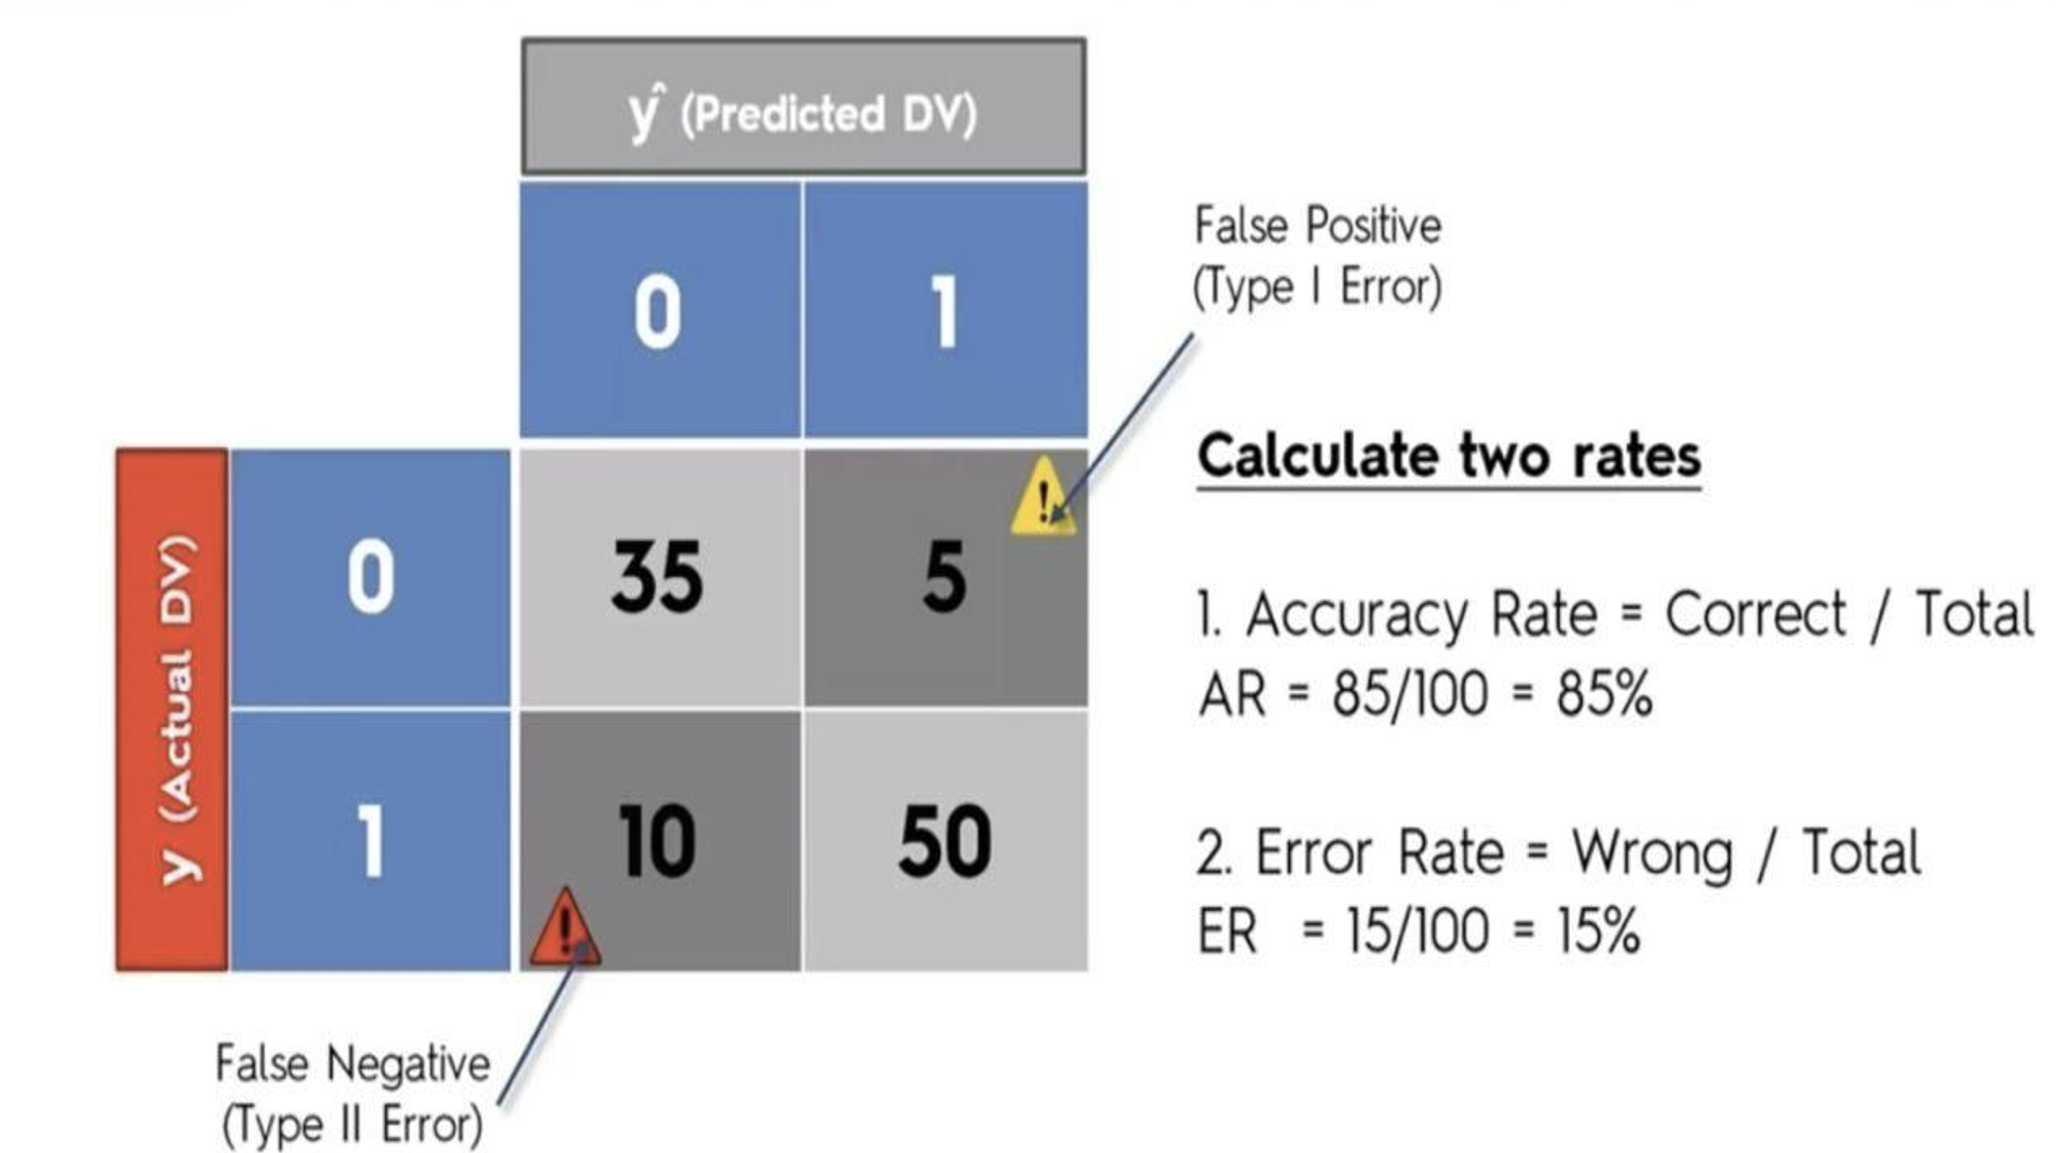

# 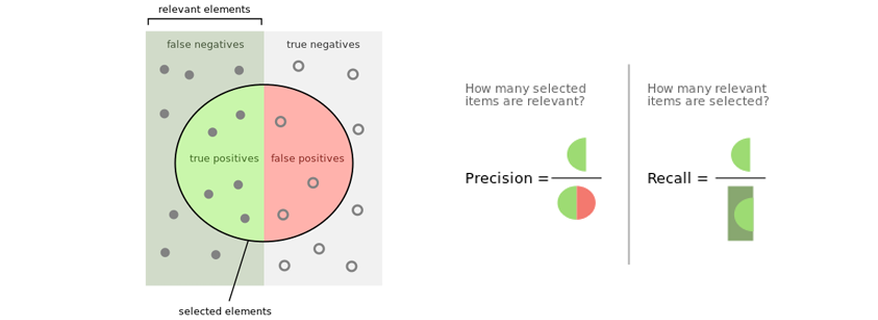

In [267]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')
cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

accuracy_score: 80.92948717948718
[[326  54]
 [ 65 179]]
True Positive: 179
True Negative: 326
False Positive: 54
False Negative: 65
precision_score1: 0.7682403433476395
precision_score2: 0.7682403433476395
recall_score: 0.7336065573770492
recall_score: 0.7336065573770492


# K-NN

In [268]:
knn = KNeighborsClassifier(n_neighbors = 5 )

In [269]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [270]:
y_pred = knn.predict(X_test)

In [271]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[333  47]
 [ 76 168]]
80.28846153846155


In [272]:
print(knn.score(X_test , y_test)*100)

80.28846153846155


In [273]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')

cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]


print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

accuracy_score: 80.28846153846155
[[333  47]
 [ 76 168]]
True Positive: 168
True Negative: 333
False Positive: 47
False Negative: 76
precision_score1: 0.7813953488372093
precision_score2: 0.7813953488372093
recall_score: 0.6885245901639344
recall_score: 0.6885245901639344


# SVM

In [274]:
svm1 = SVC(kernel = 'poly', random_state = 0)

In [275]:
svm1.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [276]:
y_pred = svm1.predict(X_test)

In [277]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[328  52]
 [ 70 174]]
80.44871794871796


In [278]:
print(svm1.score(X_test , y_test)*100)

80.44871794871796


In [279]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')

cm = confusion_matrix(y_test, y_pred)
print(cm)


tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]


print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

accuracy_score: 80.44871794871796
[[328  52]
 [ 70 174]]
True Positive: 174
True Negative: 328
False Positive: 52
False Negative: 70
precision_score1: 0.7699115044247787
precision_score2: 0.7699115044247787
recall_score: 0.7131147540983607
recall_score: 0.7131147540983607


# DecisionTreeClassifier

In [280]:
Dtc = DecisionTreeClassifier(criterion = "entropy" ,max_depth=4 ,random_state= 42  , max_features=6)
Dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=6,
                       random_state=42)

In [281]:
y_pred = Dtc.predict(X_test)

In [282]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[331  49]
 [ 58 186]]
82.8525641025641


In [283]:
print(Dtc.score(X_test , y_test)*100)

82.8525641025641


In [284]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')

cm = confusion_matrix(y_test, y_pred)
print(cm)


tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]


print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')


accuracy_score: 82.8525641025641
[[331  49]
 [ 58 186]]
True Positive: 186
True Negative: 331
False Positive: 49
False Negative: 58
precision_score1: 0.7914893617021277
precision_score2: 0.7914893617021277
recall_score: 0.7622950819672131
recall_score: 0.7622950819672131


# Random Forest

In [285]:
Rf = RandomForestClassifier(n_estimators=100, random_state=42 ,max_depth=4  , max_features=6)

In [286]:
Rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=6, random_state=42)

In [287]:
y_pred = Rf.predict(X_test)

In [288]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[325  55]
 [ 58 186]]
81.89102564102564


In [289]:
print(Rf.score(X_test , y_test)*100)

81.89102564102564


In [290]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')

cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]


print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

accuracy_score: 81.89102564102564
[[325  55]
 [ 58 186]]
True Positive: 186
True Negative: 325
False Positive: 55
False Negative: 58
precision_score1: 0.7717842323651453
precision_score2: 0.7717842323651453
recall_score: 0.7622950819672131
recall_score: 0.7622950819672131


# XGBOOST

In [291]:
#pip install xgboost

In [292]:
#pip install --upgrade xgboost

In [293]:
xgb = XGBClassifier(max_depth = 4 , learning_rate = 0.3 ,  n_estimators= 50, random_state=42 , max_features= 7 )

In [294]:
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_features=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [295]:
y_pred = xgb.predict(X_test)

In [296]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[335  45]
 [ 67 177]]
82.05128205128204


In [297]:
print(xgb.score(X_test , y_test)*100)

82.05128205128204


In [298]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')

cm = confusion_matrix(y_test, y_pred)
print(cm)


tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]


print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

accuracy_score: 82.05128205128204
[[335  45]
 [ 67 177]]
True Positive: 177
True Negative: 335
False Positive: 45
False Negative: 67
precision_score1: 0.7972972972972973
precision_score2: 0.7972972972972973
recall_score: 0.7254098360655737
recall_score: 0.7254098360655737


# GradientBoostingClassifier


In [299]:
gbc = GradientBoostingClassifier(n_estimators= 100, learning_rate=0.05, random_state=42 ,max_depth=4  , max_features=6 )

In [300]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features=6,
                           random_state=42)

In [301]:
y_pred = gbc.predict(X_test)

In [302]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[328  52]
 [ 69 175]]
80.60897435897436


In [303]:
print(gbc.score(X_test , y_test)*100)

80.60897435897436


In [304]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')

cm = confusion_matrix(y_test, y_pred)
print(cm)


tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]


print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

accuracy_score: 80.60897435897436
[[328  52]
 [ 69 175]]
True Positive: 175
True Negative: 328
False Positive: 52
False Negative: 69
precision_score1: 0.7709251101321586
precision_score2: 0.7709251101321586
recall_score: 0.7172131147540983
recall_score: 0.7172131147540983


# AdaBoostClassifier

In [305]:
#from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.2)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)


In [306]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)


[[325  55]
 [ 66 178]]
80.60897435897436


In [307]:
print(ada.score(X_test , y_test)*100)

80.60897435897436


In [308]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')

cm = confusion_matrix(y_test, y_pred)
print(cm)


tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]


print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

accuracy_score: 80.60897435897436
[[325  55]
 [ 66 178]]
True Positive: 178
True Negative: 325
False Positive: 55
False Negative: 66
precision_score1: 0.7639484978540773
precision_score2: 0.7639484978540773
recall_score: 0.7295081967213115
recall_score: 0.7295081967213115


# Voting

In [309]:
clf1 = LogisticRegression(random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=5 )
clf3 = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , n_estimators= 5, random_state=42)
clf4 = RandomForestClassifier(n_estimators=10 ,criterion = 'entropy', max_depth=4, max_features=6 ,random_state=42)

In [319]:
v_clf = VotingClassifier(estimators=[("LogisticRegression" , clf1) , ('KNeighborsClassifier' , clf2) ,
                                     ("XGBClassifier" , clf3) ,("RandomForestClassifier" , clf4)] , voting = "soft")

In [320]:
v_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(random_state=42)),
                             ('KNeighborsClassifier', KNeighborsClassifier()),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_met...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None, n_estimators=5,
                                            n_jobs=None, num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=4,
                                                     max_features=6,
                                                     n_estimators=10,
                                                     random_state=42))],
                 voting='soft')

In [325]:
y_pred = v_clf.predict(X_test)

In [326]:
y_pred = v_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[342  38]
 [ 69 175]]
82.8525641025641


In [327]:
v_clf.score(X_test , y_test)

0.8285256410256411

In [324]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')

cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

accuracy_score: 82.8525641025641
[[342  38]
 [ 69 175]]
True Positive: 175
True Negative: 342
False Positive: 38
False Negative: 69
precision_score1: 0.8215962441314554
precision_score2: 0.8215962441314554
recall_score: 0.7172131147540983
recall_score: 0.7172131147540983


# Testing

In [328]:
lf = SVC( kernel='rbf', random_state= 42 )
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [329]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('subm1.csv', index=False)

In [330]:
subm = pd.read_csv('subm.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## References

This notebook is created by learning from the following notebooks:

- [Mukesh ChapagainTitanic Solution: A Beginner's Guide](https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689)
- [How to score 0.8134 in Titanic Kaggle Challenge](http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)
- [Titanic: factors to survive](https://olegleyz.github.io/titanic_factors.html)
- [Titanic Survivors Dataset and Data Wrangling](http://www.codeastar.com/data-wrangling/)
